In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io
import os
import librosa
import sys

# setting path
sys.path.append("../Utils/")

from dB import *

In [3]:

def filter_n_decimate(filterLength_smp : int, numBands : int, inputSignal : np.array):
    """
    args :
        - filterLength : [int]
            Digital filter length, in samples
        - numBands : [int]
            Number of frequency channels in which the signal is to be separated
        - inputSignal : [(1, N) np.array]
            Input signal 
    returns :
        - outputSignals : [numBands, N) np.array]
            Output signal"""
    signalLength_smp = np.shape(inputSignal)[0] #Input signal length
    filteredSignal = np.zeros((signalLength_smp, numBands)) #initializing the output signal
    
    #h = scipy.signal.remez(numtaps = filterLength_smp, bands = [0, 1/(2*numBands), 1/(2*numBands), .5], fs = 1)

    for i in range(numBands):
        filteredSignal[:,i] = inputSignal

    filters = np.zeros((filterLength_smp, numBands))

    n = np.arange(filterLength_smp)
    base_filter = np.zeros(filterLength_smp)
    for i in range(filters):
        filters[i] = base_filter
    
    outputSignal = filteredSignal[::numBands]
    return outputSignal


sr_hz, x = scipy.io.wavfile.read(os.path.join("..", "Data", "Piano_test", "33.wav"))

y = filter_n_decimate(15, 4, x)


print(np.shape(x))
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(x))/sr_hz, x, 'k', linewidth = .2)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

sample rate : 22050


c:\Users\pelad\Documents\Scolarite\sorbonne_universite\2022_2023\Cours\Projet d'Application Musicale\Projet\ATIAM-PAM-AnalyseInstruments\Notebooks\../Utils\dB.py:4: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(np.abs(x))


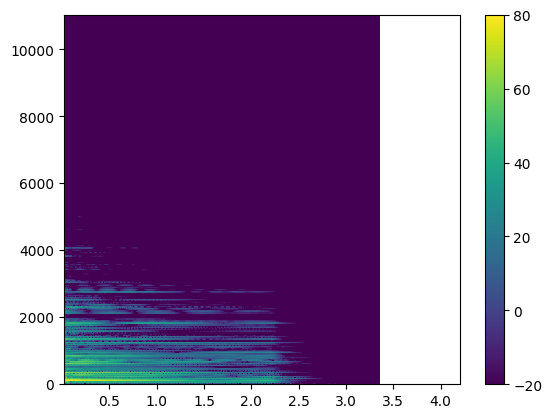

In [26]:
x, sr_hz = librosa.load(os.path.join("..", "Data", "Piano_test", "33.wav"))

n_fft = 1024
hop_length = n_fft//4

X = np.square(np.abs(librosa.stft(x ,n_fft = n_fft, hop_length = hop_length)))

t_list = librosa.frames_to_samples(np.arange(np.shape(X)[1]), n_fft = n_fft, hop_length=hop_length)/sr_hz
f_list = librosa.fft_frequencies(sr = sr_hz, n_fft = n_fft)



print(f'sample rate : {sr_hz}')

plt.pcolormesh(t_list, f_list, dB20(X), vmax = 80, vmin = -20)
plt.colorbar()
plt.show()

(513, 361)


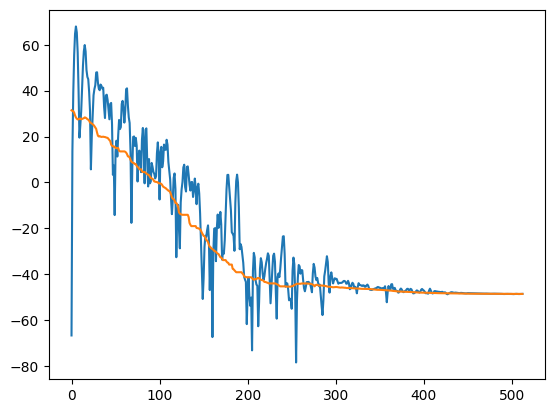

In [32]:


def filter_spectrum(X, num_bins, rank):
    """
    Returns the whitened STFT
    args :
        - X : input STFT
        - num_bins : number of frequency bins over which the quantile filter is performed
        - rank : rank of the quantile filter
    returns :
        - X_filt : filtered STFT
    """
    filtered = np.zeros(np.shape(X))
    for t in range(np.shape(X)[1]):
        for f in range(np.shape(X)[0]):
            f_lowerBound = max(0, f-num_bins//2)
            f_upperBound = min(np.shape(X)[0]-1, f+num_bins//2)
            filtered[f,t] = np.quantile(X[f_lowerBound:f_upperBound,t], q = rank)
    return filtered

print(np.shape(X))
X_filt = filter_spectrum(X, 101, .3)

plt.plot(dB20(X[:,0]))
plt.plot(dB20(X_filt[:,0]))
plt.show()


In [6]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.  Color-mapping is controlled by *cmap*,
        *norm*, *vmin*, and *vmax*.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1